# 📊Data visualization

In [1]:
import pandas as pd
import numpy as np

In [20]:
# Step 1: Load and preprocess the data
loan_data = pd.read_csv("/content/loan_data.csv")  # Replace with your dataset path
loan_data.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


# Data Overview and Cleaning
Steps:

*  Load the dataset and examine its structure (columns, data types, and shape).
*  Check for missing values and duplicates.

*  Handle missing values (if any) using appropriate imputation (e.g., mean for numeric, mode for categorical).

*  Check for outliers in numerical variables using boxplots or z-scores.

In [22]:
# Data Overview
print(loan_data.info())
print(loan_data.describe())
print(loan_data.isnull().sum())  # Check for missing values
print(loan_data.duplicated().sum())  # Check for duplicate rows

# Handle missing values (if applicable)
loan_data.fillna({'column_name': 'value'}, inplace=True)

# Detecting outliers using z-scores
from scipy.stats import zscore

# Replace 'numerical_column' with the actual numerical column name from your dataset
numerical_column_name = 'person_age'  # Example: Replace with the correct column name
loan_data['z_score'] = zscore(loan_data[numerical_column_name])
outliers = loan_data[loan_data['z_score'] > 3]  # Rows with z-scores > 3

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  int64  
 2   person_education                45000 non-null  int64  
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  int64  
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  int64  
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [21]:
# Encode Categorical Columns (if not already encoded).

# convert categorical data into Numerical data before scaling
loan_data.replace({
                    'person_gender':{'female':0, 'male':1},
                     'person_education':{'High School':0, 'Bachelor':1,'Associate':2,'Master':3, 'Doctorate':4},
                      'person_home_ownership':{'RENT':0, 'MORTGAGE': 1, 'OWN':2, 'OTHER':3},
                     'previous_loan_defaults_on_file': {'No':0, 'Yes':1},
                    'loan_intent': {'EDUCATION':0,'MEDICAL':1, 'VENTURE':2, 'PERSONAL':3, 'DEBTCONSOLIDATION': 4,
                                        'HOMEIMPROVEMENT': 5 }},
                  inplace=True)

<ipython-input-21-5dba2d2a0c58>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  loan_data.replace({


# Descriptive Statistics
Steps:

*  Summarize the central tendency and dispersion of numerical variables (mean, median, standard deviation).
*  Use frequency tables for categorical variables to understand their distribution.

In [13]:
# Numerical summary
print(loan_data.describe())

# Frequency distribution for categorical variables
categorical_columns = ['person_gender', 'loan_intent', 'person_home_ownership']
for col in categorical_columns:
    print(loan_data[col].value_counts())


         person_age  person_gender  person_education  person_income  \
count  45000.000000   45000.000000      45000.000000   4.500000e+04   
mean      27.764178       0.552022          1.352867   8.031905e+04   
std        6.045108       0.497292          1.074006   8.042250e+04   
min       20.000000       0.000000          0.000000   8.000000e+03   
25%       24.000000       0.000000          0.000000   4.720400e+04   
50%       26.000000       1.000000          1.000000   6.704800e+04   
75%       30.000000       1.000000          2.000000   9.578925e+04   
max      144.000000       1.000000          4.000000   7.200766e+06   

       person_emp_exp  person_home_ownership     loan_amnt   loan_intent  \
count    45000.000000           45000.000000  45000.000000  45000.000000   
mean         5.410333               0.549822   9583.157556      2.207489   
std          6.063532               0.627919   6314.886691      1.649272   
min          0.000000               0.000000    500.0000

# Feature Distribution Across Groups
Steps:

*  Compare the distribution of key numerical features (e.g., loan_amnt, credit_score) across different loan statuses.
*   Use boxplots or violin plots for better visualization.

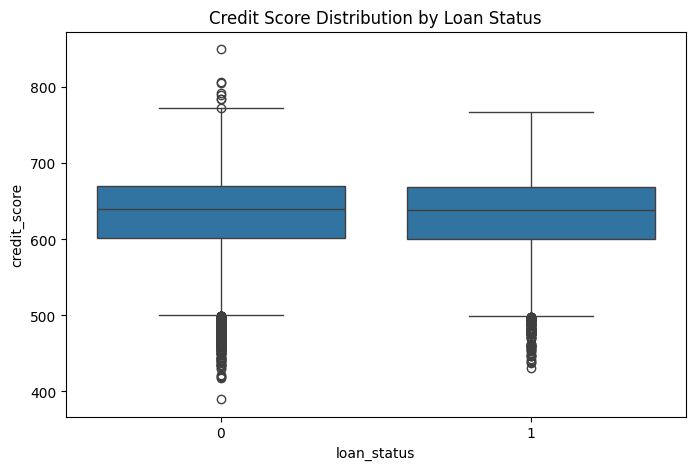

*****


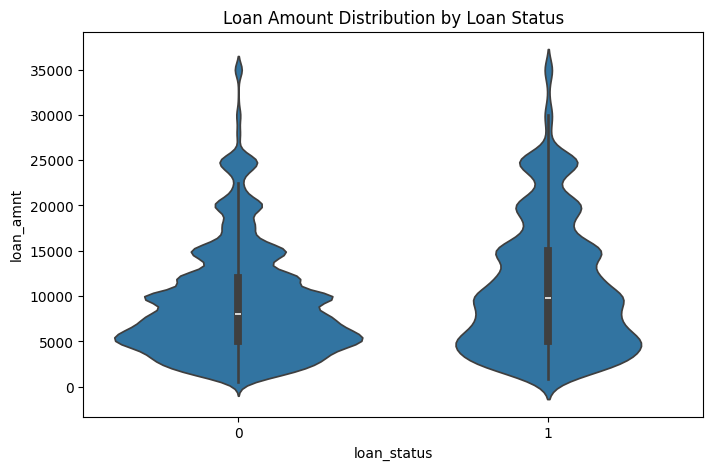

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot for credit score by loan status
plt.figure(figsize=(8, 5))
sns.boxplot(x='loan_status', y='credit_score', data=loan_data)
plt.title('Credit Score Distribution by Loan Status')
plt.show()
print("*****")
# Violin plot for loan amount by loan status
plt.figure(figsize=(8, 5))
sns.violinplot(x='loan_status', y='loan_amnt', data=loan_data)
plt.title('Loan Amount Distribution by Loan Status')
plt.show()

# Outlier Detection and Treatment
Steps:

*  Detect outliers in numerical variables using boxplots or interquartile range (IQR).
*  Decide whether to remove or transform outliers based on domain knowledge.

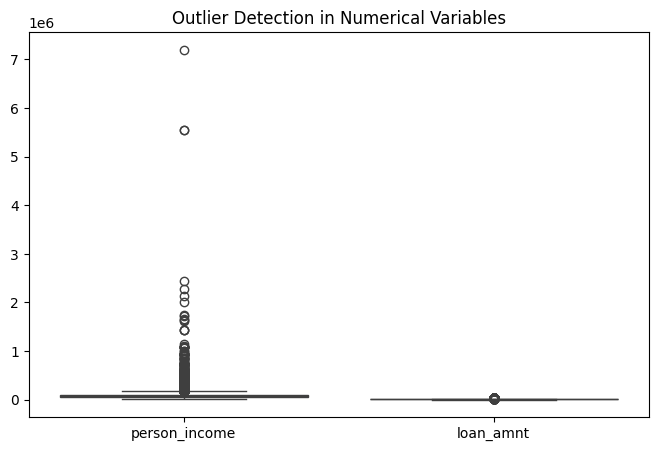

In [15]:
# Boxplot for outlier detection
plt.figure(figsize=(8, 5))
sns.boxplot(data=loan_data[['person_income', 'loan_amnt']])
plt.title('Outlier Detection in Numerical Variables')
plt.show()

# Remove outliers using IQR
Q1 = loan_data['person_income'].quantile(0.25)
Q3 = loan_data['person_income'].quantile(0.75)
IQR = Q3 - Q1
loan_data_cleaned = loan_data[~((loan_data['person_income'] < (Q1 - 1.5 * IQR)) |
                                (loan_data['person_income'] > (Q3 + 1.5 * IQR)))]


# Visualization of Patterns
Steps:

*  Use heatmaps for correlations between numerical features.
*  Generate violin or bar plots for patterns between features and loan status.

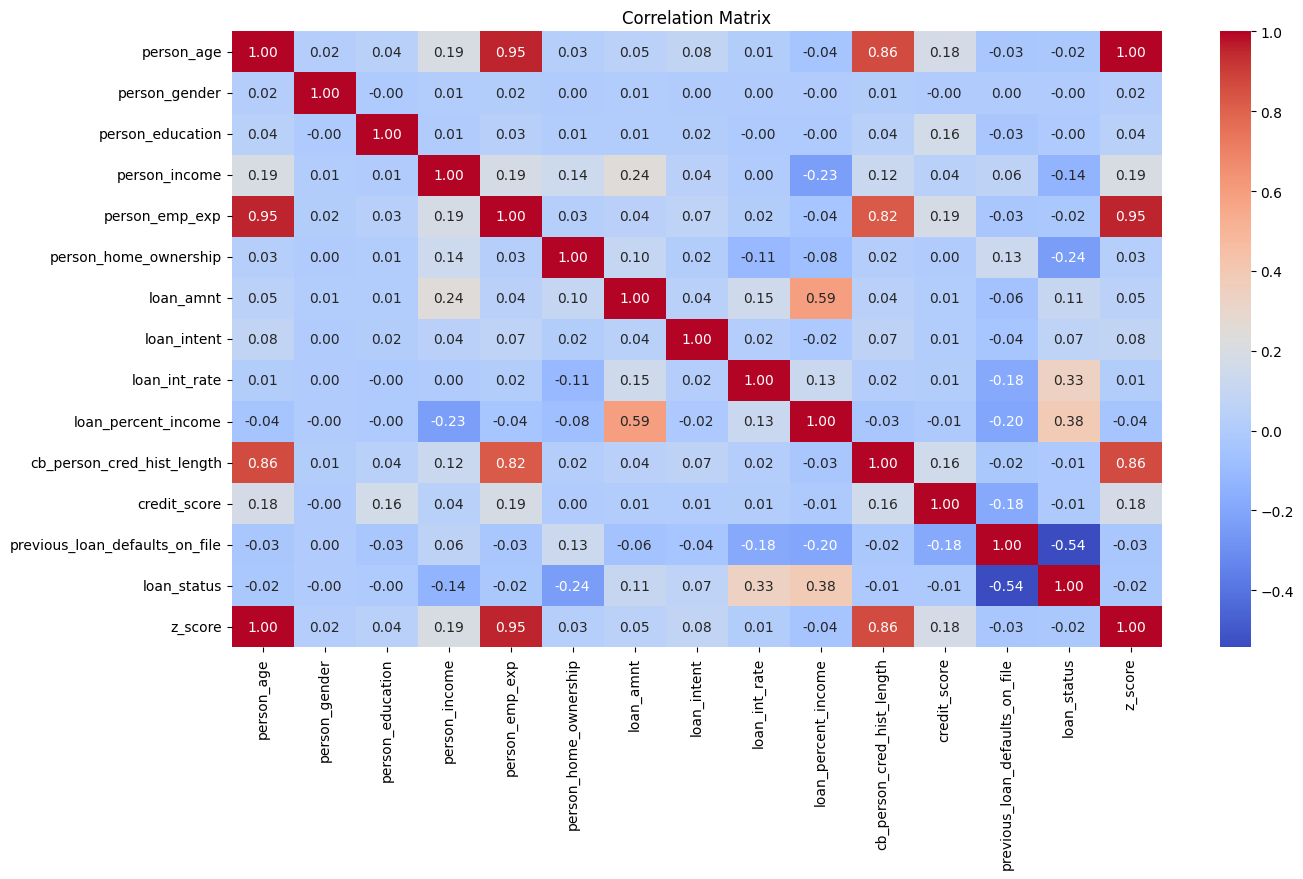

***************************


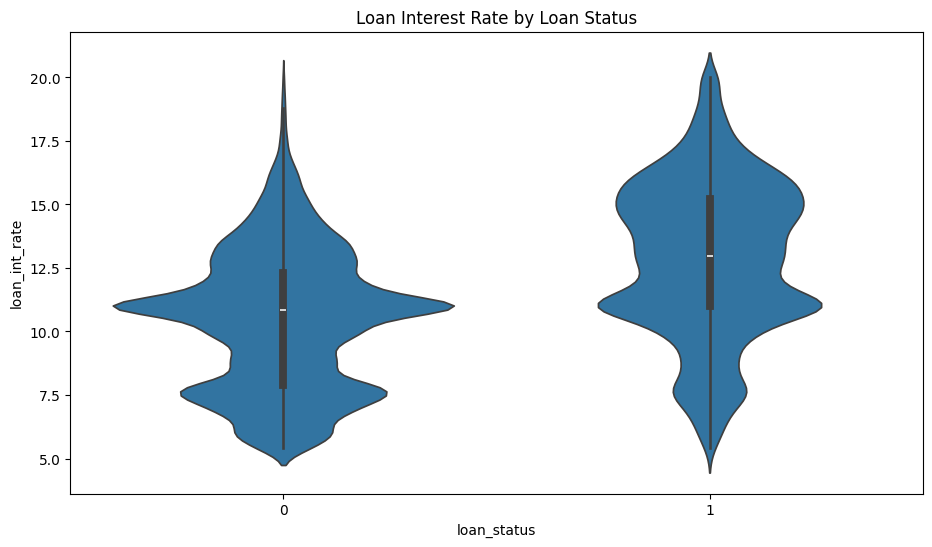

In [18]:
# Heatmap for correlation matrix
plt.figure(figsize=(15, 8))
correlation_matrix = loan_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()
print("***************************")
# Violin plot for interest rate by loan status
plt.figure(figsize=(11, 6))
sns.violinplot(x='loan_status', y='loan_int_rate', data=loan_data)
plt.title('Loan Interest Rate by Loan Status')
plt.show()
